# Travaux pratiques - Méthodes à noyaux

L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des machines à vecteurs de support (*Support Vector Machines*, SVM) pour les problèmes de classification non-lineaire en python avec Scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  
- [Site LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)  
- [Site LibLinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)  

# Machines à vecteurs de support (SVM)

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe des méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :

- Très efficaces en dimension élevée.  
- Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage.  
- N’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  


Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances seront moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas directement des estimations de probabilités.  

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

## Scikit-learn

Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version à noyaux (Scikit-learn utilise la bibliothèque LibSVM déjà discutée).

In [ ]:
#!pip install -U scikit-learn
# Une version récente de sklearn est nécessaire pour gamma='scale' (cf. plus bas)

Relisez le TP SVM linéaire (partie Scikit-learn) pour vous remettre dans le contexte (quels sont les classes Python utilisées et leurs paramètres). La [documentation de scikit-learn sur les SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) vous sera utile.

Nous allons reprendre la classification sur les données Iris.

In [1]:
# Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Refaites la classification de la base de données `iris` mais avec un noyau gaussien. Testez l’effet du paramètre d’échelle du noyau (`gamma`) et du paramètre de régularisation `C`.
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>

In [39]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [3]:
clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9733333333333334

Comme dans le TP précédent, nous pouvons afficher la frontière de décision en ne conservant que deux variables explicatives :

In [5]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Text(0.5, 1.0, 'SVM RBF')

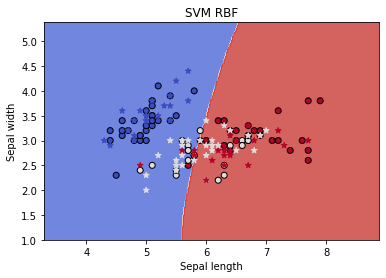

In [6]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Que constatez-vous par rapport au TP précédent ?
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>
<div style="display: flex; border-left: 0.2em solid #006e12;)" > 

L’utilisation du noyau gaussien permet d’obtenir des frontières de décision non linéaires. Le paramètre `gamma` correspond au rayon d’influence de chaque observation : plus `γ` est élevé, plus le rayon d’influence de chaque observation est réduit. Les observations plus proches de la frontière ont donc plus de poids et la frontière aura tendance à « coller » aux observations.
</div>

# Jeu de données Digits

Reprenons notre base de données Digits de chiffres manuscrits.

In [8]:
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(1797, 64)
(1797,)


<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Réalisez une classification par une SVM linéaire et une SVM à noyau gaussien du jeu de données Digits.
Comment est choisi le paramètre `gamma` dans scikit-learn ? Testez différentes valeurs de ce paramètre pour évaluer son influence. En particulier, testez les paramètres `gamma='auto'` et `gamma='scale'`. À quoi correspondent-ils ?
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>

In [16]:
def test(X_s, y_train,kernel='rbf', C = 1.0, gamma="scale"):

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma).fit(X_s, y_train)

    # Créer la surface de décision discretisée
    x_min, x_max = X_s[:, 0].min() - 1, X_s[:, 0].max() + 1
    y_min, y_max = X_s[:, 1].min() - 1, X_s[:, 1].max() + 1
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    title = 'SVC noyau RBF'

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_s[:, 0], X_s[:, 1], c=y_train, marker='+', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(title)
    plt.show()

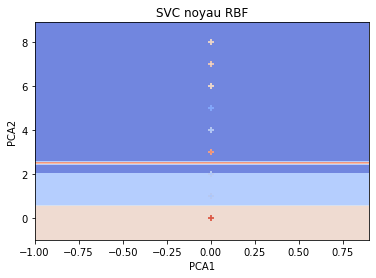

In [27]:
test(X_train[:,0:2], y_train,kernel='linear', C = 1.0)

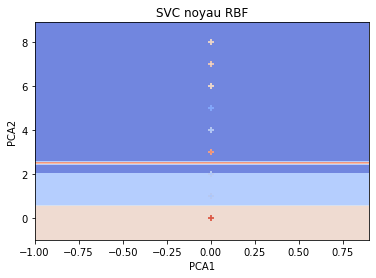

In [28]:
test(X_train[:,0:2], y_train,kernel='linear', gamma='auto', C = 1.0)

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Réalisez une analyse en composante principale (ACP) et gardez les 2 premières composantes principales (voir la [documentation Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Ensuite faites une classification avec un noyau gaussien et affichez les points de test ainsi que la surface de décision (reprendre le code du TP SVM linéaire). Comparez avec une SVM linéaire.
</div>

In [29]:
# ACP
pca = PCA(n_components=2)
X_s = pca.fit_transform(X_train)

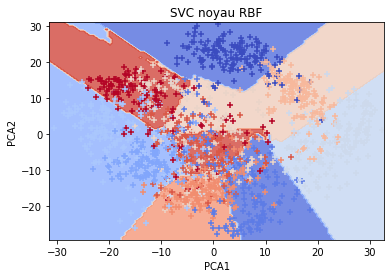

In [30]:
test(X_s, y_train,kernel='linear', C = 1.0)

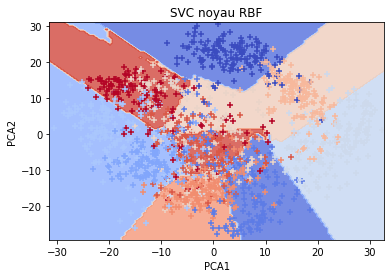

In [31]:
test(X_s, y_train,kernel='linear', gamma='auto', C = 1.0)

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Réalisez une recherche par grille afin de déterminer sur le jeu de données Digits complet (sans l’ACP) :
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

- le meilleur noyau à utiliser,  
- la meilleure valeure de `C`,  
- la meilleure valeur de `gamma` (ou le degré du polynome pour un noyau polynomial).  
- (optionnel) la meilleure valeur de `n_components` de l’ACP  

</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>

<div style="display: flex; border-left: 0.2em solid #006e12;" > 

Par exemple, avec une `GridSearch` en cherchant diverses combinaisons de paramètres en fonction du type de noyau considéré. `n_jobs=4` permet de paralléliser les calculs sur 4 coeurs. Attention, cela prend du temps !
</div>

In [34]:
param_grid = [
    {'kernel': ['rbf'], 'gamma': ['auto', 'scale', 0.1, 1, 10], 'C': [0.01, 0.1, 1.0, 10, 100]},
    {'kernel': ['poly'], 'degree': [3, 10, 30], 'C': [0.01, 0.1, 1.0, 10, 100]},
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1.0, 10, 100]}
]

In [35]:
clf = GridSearchCV(svm.SVC(), param_grid, cv=3, n_jobs=4, verbose=1)
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 1.0, 'degree': 3, 'kernel': 'poly'}


<div style="display: flex; border-left: 0.2em solid #006e12;" > 

Pour déterminer automatiquement ces hyperparamètres ainsi que le nombre de composantes de l’ACP, il faut construire un Pipeline de scikit-learn :
</div>

In [36]:
pca = PCA()

# En supposant que l'on se concentre sur une SVM RBF
svc = svm.SVC(kernel='rbf', gamma='scale')
pipe = Pipeline(steps=[('pca', pca), ('svm', svc)])

# Syntaxe : nomdustep__nomduparamètre
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'svm__C': [0.1, 1.0, 10, 100],
}
search = GridSearchCV(pipe, param_grid, n_jobs=4, verbose=1)
search.fit(X_train, y_train)
print(search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'pca__n_components': 30, 'svm__C': 10}


In [37]:
print(search.score(X_test, y_test))

0.9916666666666667


<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

(optionnel) Combien de composantes faut-il garder au minimum dans l’ACP pour classer correctement au moins 97% des images ? À quel facteur de réduction de dimension cela correspond-il ?
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>

<div style="display: flex; border-left: 0.2em solid #006e12;" > 

Les 10 premières composantes après ACP suffisent à classer correctement >97% des images de chiffre. Les images contenant 64 valeurs (8x8 pixels), cela correspond à 85% de réduction de dimension. C’est intéressant car la SVM avec un noyau RBF est environ 3 fois plus rapide avec 10 composantes qu’avec 64 dans notre cas. Par exemple 
</div>

In [38]:
pca = PCA(n_components=10)
svc = svm.SVC(kernel='rbf', gamma='scale')
pipe = Pipeline(steps=[('pca', pca), ('svc', svc)])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
# Environ 0.972

0.9805555555555555


<div style="display: flex; border-left: 0.2em solid #006e12;" > 

Pour aller plus loin, il est possible de combiner les `pipelines` de scikit-learn avec le système de sélection de modèle `GridSearch`, voir cet exemple de la documentation.
</div>

# Approfondissement : LibSVM

<div style="display: flex; border-left: 0.2em solid yellow; color:yellow; font-weight:bold;" > 

#### Note
</div>
<div style="display: flex; border-left: 0.2em solid yellow;)" > 

Cette partie est facultative. Elle vous permet de manipuler directement les bibiothèques LibLinear et LibSVM sur lesquelles s’appuie scikit-learn pour les machines à vecteur de supports. Ces implémentations sont très rapides et sont écrites en langage C.
</div>
<div style="display: flex; border-left: 0.2em solid yellow;)" > 
Il est nécessaire d’avoir un compilateur C fonctionnel pour cette partie.
</div>


LibSVM est une implémentation sous licence libre qui s’est imposée ces derniers années et qui est utilisée par beaucoup de logiciels comme moteur de classification. Par exemple, Scikit-learn utilise cette bibliothèque pour son module `sklearn.svm`.

Pour l’obtenir et la compiler suivre ces pas :

In [ ]:
cd ~
rm -rf tpsvm
mkdir tpsvm
cd tpsvm
wget http://cedric.cnam.fr/~ferecatu/RCP209/libsvm-3.22.tar.gz
tar xzvf libsvm-3.22.tar.gz
cd libsvm-3.22/
make

Pour comprendre les différents noyaux disponibles dans cette bibliothèque et leurs paramètres, lisez le document README dans le répertoire `libsvm-3.22/`.

Dans une première étape, nous allons essayer de dépasser les performances de `libLinear` sur la base de données MNIST en utilisant un C-SVC à noyau gaussien. Nous allons tester seulement 2 classes, les chiffres 5 et 6.

In [ ]:
cd ~
cd tpsvm
# Récupérer et compiler libLinear
wget http://cedric.cnam.fr/~ferecatu/RCP209/liblinear-2.2.tar.gz
tar xzvf liblinear-2.2.tar.gz
cd liblinear-2.2/
make
# Récupérer la base de données
cd ~
cd tpsvm
mkdir databases
cd databases
wget http://cedric.cnam.fr/~ferecatu/RCP209/mnist.bz2
wget http://cedric.cnam.fr/~ferecatu/RCP209/mnist.t.bz2
bzip2 -d mnist.bz2
bzip2 -d mnist.t.bz2
cat mnist | grep '^5 \|^6 ' | shuf -n 2000 > 56
cat mnist.t | grep '^5 \|^6 ' | shuf -n 1000 > 56.t
# Nombre d'échantillons d'apprentissage de la classe 5
cat 56 | grep '^5' | wc -l
>>> 951
# Nombre d'échantillons d'apprentissage de la classe 6
cat 56 | grep '^6' | wc -l
>>> 1049

Entrainer un modèle C-SVM linéaire avec les paramètres par défaut :

In [ ]:
../liblinear-2.2/train 56 56.model_linear
../liblinear-2.2/predict 56.t 56.model_linear 56.t.output_linear
>>> Accuracy = 96.4% (964/1000)

Entrainer un modèle C-SVM à noyau gaussien et paramètres par défaut :

In [ ]:
../libsvm-3.22/svm-train 56 56.model_default
../libsvm-3.22/svm-predict 56.t 56.model_default 56.output_default
>>> Accuracy = 52.3% (523/1000) (classification)

Comme on peut le voir, les performances avec les paramètres par défaut ne sont pas très bonnes. Surtout le paramètre `gamma` est beaucoup trop petit (`gamma` est inversement proportionnel à la variance de la gaussienne, donc on est en situation de sous apprentissage - gaussienne trop large, car variance élevée). Par la suite on va mettre les données à l’échelle (chaque attribut entre 0 et 1) et garder toujours les paramètres par défaut.

In [ ]:
../libsvm-3.22/svm-scale -l 0 56 > 56.scaled
../libsvm-3.22/svm-scale -l 0 56.t > 56.t.scaled
../liblinear-2.2/train 56.scaled 56.scaled.model_linear
../liblinear-2.2/predict 56.t.scaled 56.scaled.model_linear 56.t.scaled.output_linear
>>> Accuracy = 96.7% (967/1000)
# On ne gagne pas beaucoup avec un classifieur linéaire
../libsvm-3.22/svm-train 56.scaled 56.scaled.model_default
../libsvm-3.22/svm-predict 56.t.scaled 56.scaled.model_default 56.scaled.output_default
>>> Accuracy = 97.8% (978/1000) (classification)

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Cette fois-ci les résultats sont meilleurs. Regardez le fichier `56.scaled.model_default`, quelles sont les valeurs des paramètres C et `gamma` ?
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Nous allons chercher les meilleurs paramètres par *grid search* pour ce jeux de données.
</div>

cf : http://cedric.cnam.fr/vertigo/cours/ml2/tpMethodesNoyaux.html

In [ ]:
python ../libsvm-3.22/tools/grid.py -svmtrain ../libsvm-3.22/svm-train 56.scaled
>>> [local] 5 -7 98.7 (best c=32.0, g=0.0078125, rate=98.7)
>>> ...
>>> 8.0 0.03125 99.15

Le script nous propose `C = 8` et `gamma = 0.03125`.

In [ ]:
../libsvm-3.22/svm-train -c 8 -g 0.03125 56.scaled 56.scaled.model
../libsvm-3.22/svm-predict 56.t.scaled 56.scaled.model 56.scaled.output
>>> Accuracy = 99.3% (993/1000) (classification)

Un bien meilleur score donc que dans le cas linéaire.

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Extraire un partie de 10000 échantillons de la base MNIST (toutes les 10 classes) et réduire le jeux de données entre 0 et 1. Coupez la base en deux parties égales apprentissage (`train`) et test (`test`) avec `libsvm-3.22/tools/subset.py`.  Comparez le classifieurs libLinear et libSVM avec les paramètres par défaut. Esayez d’autres noyaux que le gaussien. Faites varier les parametres.
</div>

### SVM-toy

Par la suite on va explorer l’outil `svm-toy` qui permet de visualiser la classification pour des problèmes en deux dimensions.

> 

In [ ]:
cd ~/tpsvm/libsvm-3.22/svm-toy/gtk
make
./svm-toy


Cliquez sur la surface d’affichage pour ajouter des points d’apprentissage. Changez de couleur pour ajouter une nouvelle classe (l’outil gère aussi la classification multi-classe). Utilisez l’option `-t 2` pour sélectionner la classification par noyau gaussien. Pour changer le paramètre C=valeur utilisez l’option `-c valeur` (par exemple : `-c 2.5`). Pour changer le paramètre `gamma` du noyau utilisez l’option `-g valeur` (par exemple : `-g 2.5`). Testez plusieurs valeurs pour les paramètres C et `gamma` afin de comprendre leur effet sur le fichier suivant : [04.dat](docs/04.dat). Générez d’autres jeux de données par vous-même est testez d’autres noyaux (voir le fichier `libsvm-3.22/README`).

> 

### Question :

[Optionnel : à faire à la fin du TP si’il vous reste du temps] Regardez les sources `c` de la bibliothèque libSVM. Où sont implementés les noyaux ? Ajoutez le noyau angulaire dans le code (K(x, y) = - ||x-y||) et recompilez svm-toy. Testez-le avec un jeu de données de type spirale (voir transparent 27 du cours). Comparez avec le noyau gaussien.